In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1


In [4]:
df.shape

(39, 5)

In [5]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,39.000000,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051,0.512821
std,23.734872,16.225677,28.046905,0.506370
min,0.000000,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000,0.000000
50%,30.000000,35.000000,30.000000,1.000000
75%,50.000000,45.000000,62.500000,1.000000
max,89.000000,60.000000,100.000000,1.000000


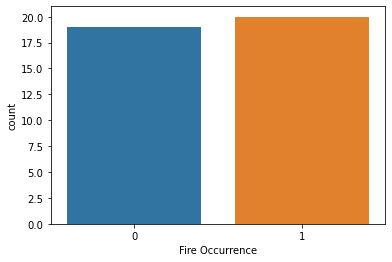

In [6]:
sns.countplot(df['Fire Occurrence'])

In [7]:
df.isnull().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             29 non-null     object
 1   Oxygen           39 non-null     int64 
 2   Temperature      39 non-null     int64 
 3   Humidity         39 non-null     int64 
 4   Fire Occurrence  39 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [9]:
df.corr()

,Oxygen,Temperature,Humidity,Fire Occurrence
Oxygen,1.000000,0.288074,-0.175256,0.582598
Temperature,0.288074,1.000000,-0.118993,0.785044
Humidity,-0.175256,-0.118993,1.000000,-0.358807
Fire Occurrence,0.582598,0.785044,-0.358807,1.000000


In [10]:
df = df.drop('Area',axis=1)

In [11]:
X = df.drop("Fire Occurrence",axis=1)
y = df['Fire Occurrence']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 41)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [13]:
y_pred = lr.predict_proba(X)

In [17]:
lr.score(X,y)*100

100.0

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

In [ ]:
y_pred_rfc = rfc.predict_proba(X_test)

In [ ]:

cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_rfc

In [ ]:

rfc.score(X_test,y_test)*100

In [19]:
result = lr.predict_proba([[40, #Oxygen
                  35, #Temperature
                  20 #Humidity
                     ]])

In [33]:
round(result[0][1]*100,0)

99.0

In [34]:
import pickle
# Creating a pickle file for the classifier use logistic classifier
filename = 'forest-fire-prediction.pkl'
pickle.dump(lr, open(filename, 'wb'))